# Trace Estimator  
https://doi.org/10.1016/0377-0427(96)00018-0 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#for part e)
from matrices import * 
import time 
from scipy.linalg import block_diag
from helpers import *
#to save the results in a pickle file
import os 
import pickle
import pandas as pd

## e) Numerical experiments | need to be run for different accuracies (that's what is asked)
so that's what I did, there's not much difference between the different accuracies, maybe when increasing matrix size we'll see a change

In [7]:
def numerical_experiments2(matrix, matrix_label, savefile):
    '''
    runs the numerical experiments and returns 2 array with the running time and the value found for each experiment
    
        input: matrix: numpy array the matrix we want to study
    
        output: list of the running time for each numerical experiment for matrix list of the computed value
    '''
    #defining the required values
    
    n=matrix.shape[0]
    matrix_running_time=np.zeros(8)
    matrix_trace_value=np.zeros(8)
    
    def f(x):
        return 1/x
    
    tol=[1e-8,1e-5, 1e-1]
    
    #using algorithm 1
    
    for k in range(len(tol)):
        start=time.time()
        Tr_A_inv=0

        for i in range (n):
            e=np.zeros(n)
            e[i]=1
            Tr_A_inv+=algorithm_1(matrix,e,function=f, maxit=50, epsilon=tol[k])

        execution_algo_1=time.time()-start
        matrix_running_time[k]=execution_algo_1
        matrix_trace_value[k]=(Tr_A_inv[0]+Tr_A_inv[1])/2
    
    #running time of algo 2

    for k in range(len(tol)):
        start=time.time()
        L=algorithm_2(matrix,m=50,p=0.5, function=f, epsilon=tol[k]) #for some m,p to tune 
        execution_algo_2=time.time()-start 

        matrix_running_time[3+k]=execution_algo_2
        matrix_trace_value[3+k]=L[2]
    
    #running time using built in numpy functions
    start=time.time()
    Tr_A_inv=np.trace(np.linalg.inv(matrix))
    execution_built_in=time.time()-start 
    matrix_running_time[6]=execution_built_in
    matrix_trace_value[6]=Tr_A_inv
    
    #running time using n linear systems

    start=time.time()
    Tr_A_inv=np.trace(np.linalg.solve(matrix, np.eye(n)))
    execution_linear=time.time()-start
    matrix_running_time[7]=execution_linear
    matrix_trace_value[7]=Tr_A_inv
    
    mpl.rcParams["font.size"] = 20
    
    fig, axs=plt.subplots(2,1, figsize= (20,25), sharey = False, sharex = False)
    legend = ['algo_1_1e-8', 'algo_1_1e-5', 'algo_1_1e-1','algo_2_1e-8', 'algo_2_1e-5', 'algo_2_1e-1','tr(A-1)', 'lin. systems']
    
    axs[0].bar(legend, matrix_running_time, color='b')
    axs[0].set_yscale('log')
    axs[0].set_ylabel('running time in seconds (in logscale)', fontsize=30)
    axs[0].set_title('running time differences for '+ matrix_label, fontsize=42)
    
    axs[1].bar(legend, matrix_trace_value, color='orange')
    axs[1].set_yscale('log')
    axs[1].set_ylabel('computed value of the method (in logscale)', fontsize=30)
    axs[1].set_title('computed value differences for '+ matrix_label, fontsize=42)
    
    plt.savefig('new_figures/' + savefile +'.png')
    
    return

In [8]:
#--- I have set all the sizes so that they are our matrices final sizes. I have chosen st they are same as in the paper and
#if in the paper was paper the biggest size below that that fit in memory

#defining all the matrices at once

#heat_flow_matrix 
N=30 #hence has final size 900 as in the paper
nu=0.2 
heat_flow_matrix=heat_flow_function(nu,N)

# VFH matrix
VFH_matrix=-VFH_function(4) #hence has size 625 as in the paper

#Poisson matrix
poisson_matrix=Poisson_function(30) #hence has size 900 as in the paper

#Wathen matrix
nx=12
ny=12 #as in the paper
wathen_matrix=wathen_ge(nx, ny)
    
#Lehmer matrix
lehmer_matrix=Lehmer_function(200) #as in the paper

#Pei matrix
alpha=1
n=300 #as in the paper
pei_matrix=Pei_function(alpha, n)

#### Heat flow matrix

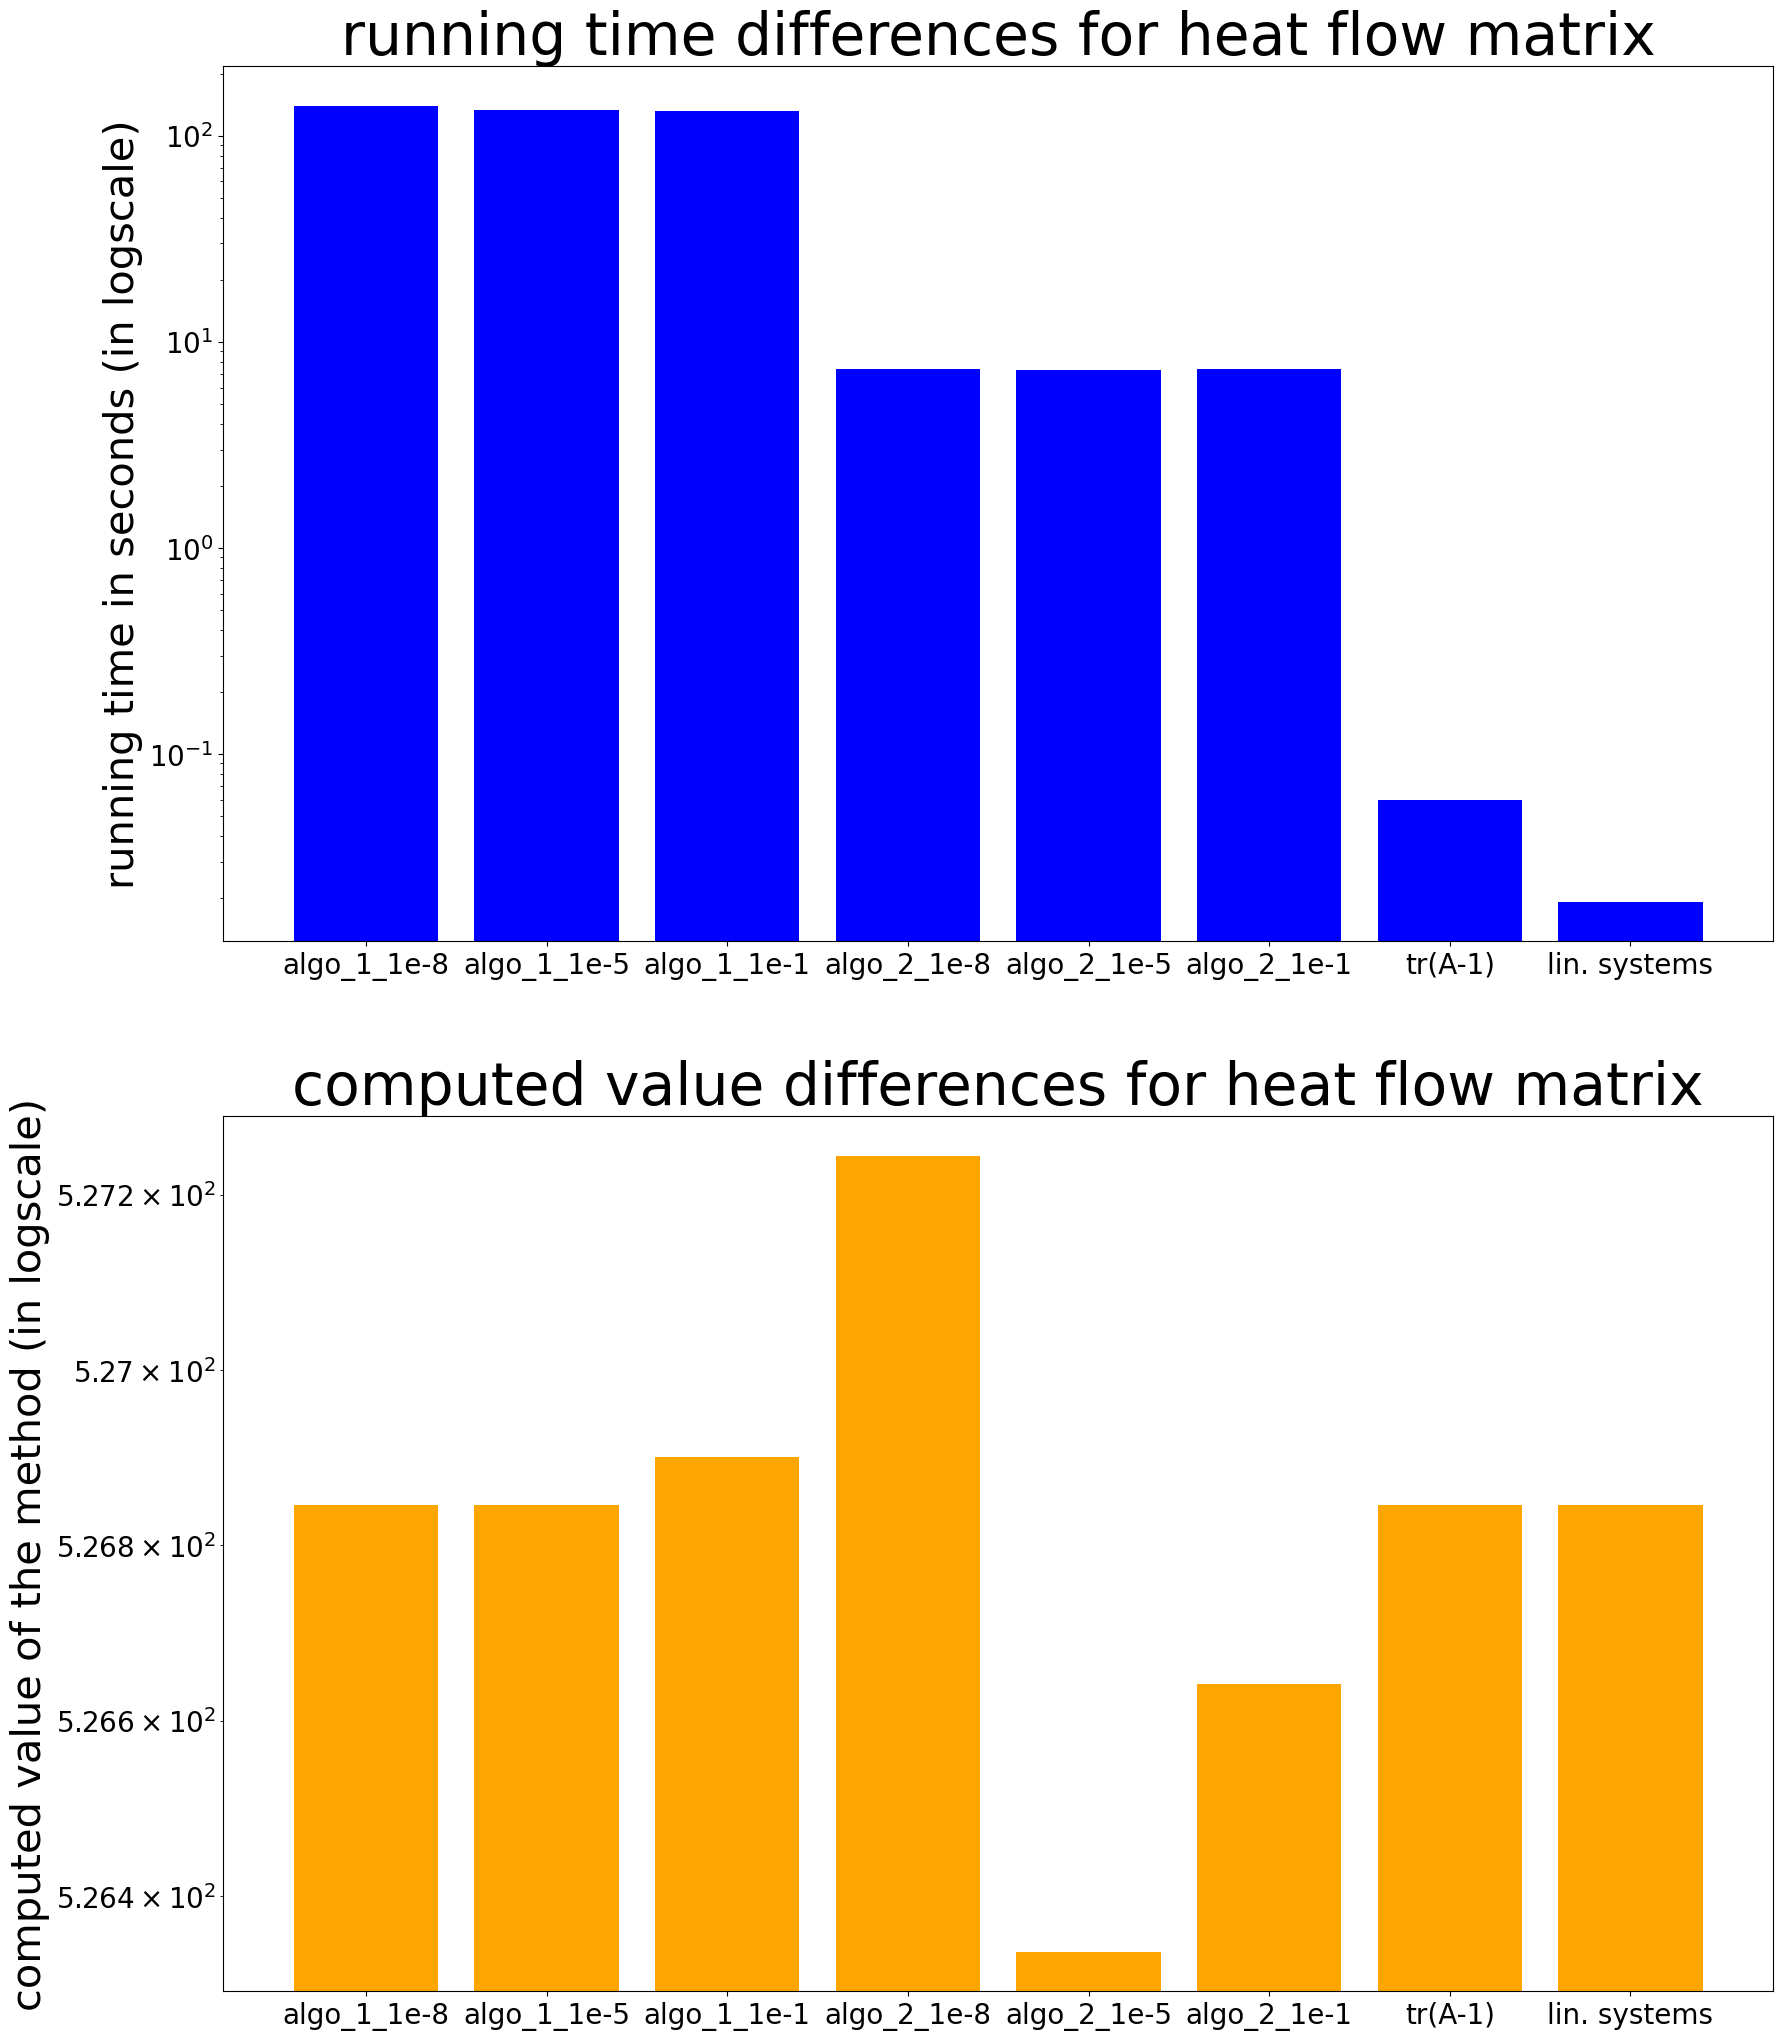

In [9]:
numerical_experiments2(heat_flow_matrix, "heat flow matrix", 'running_time_heat_flow_matrix')

#### VFH matrix

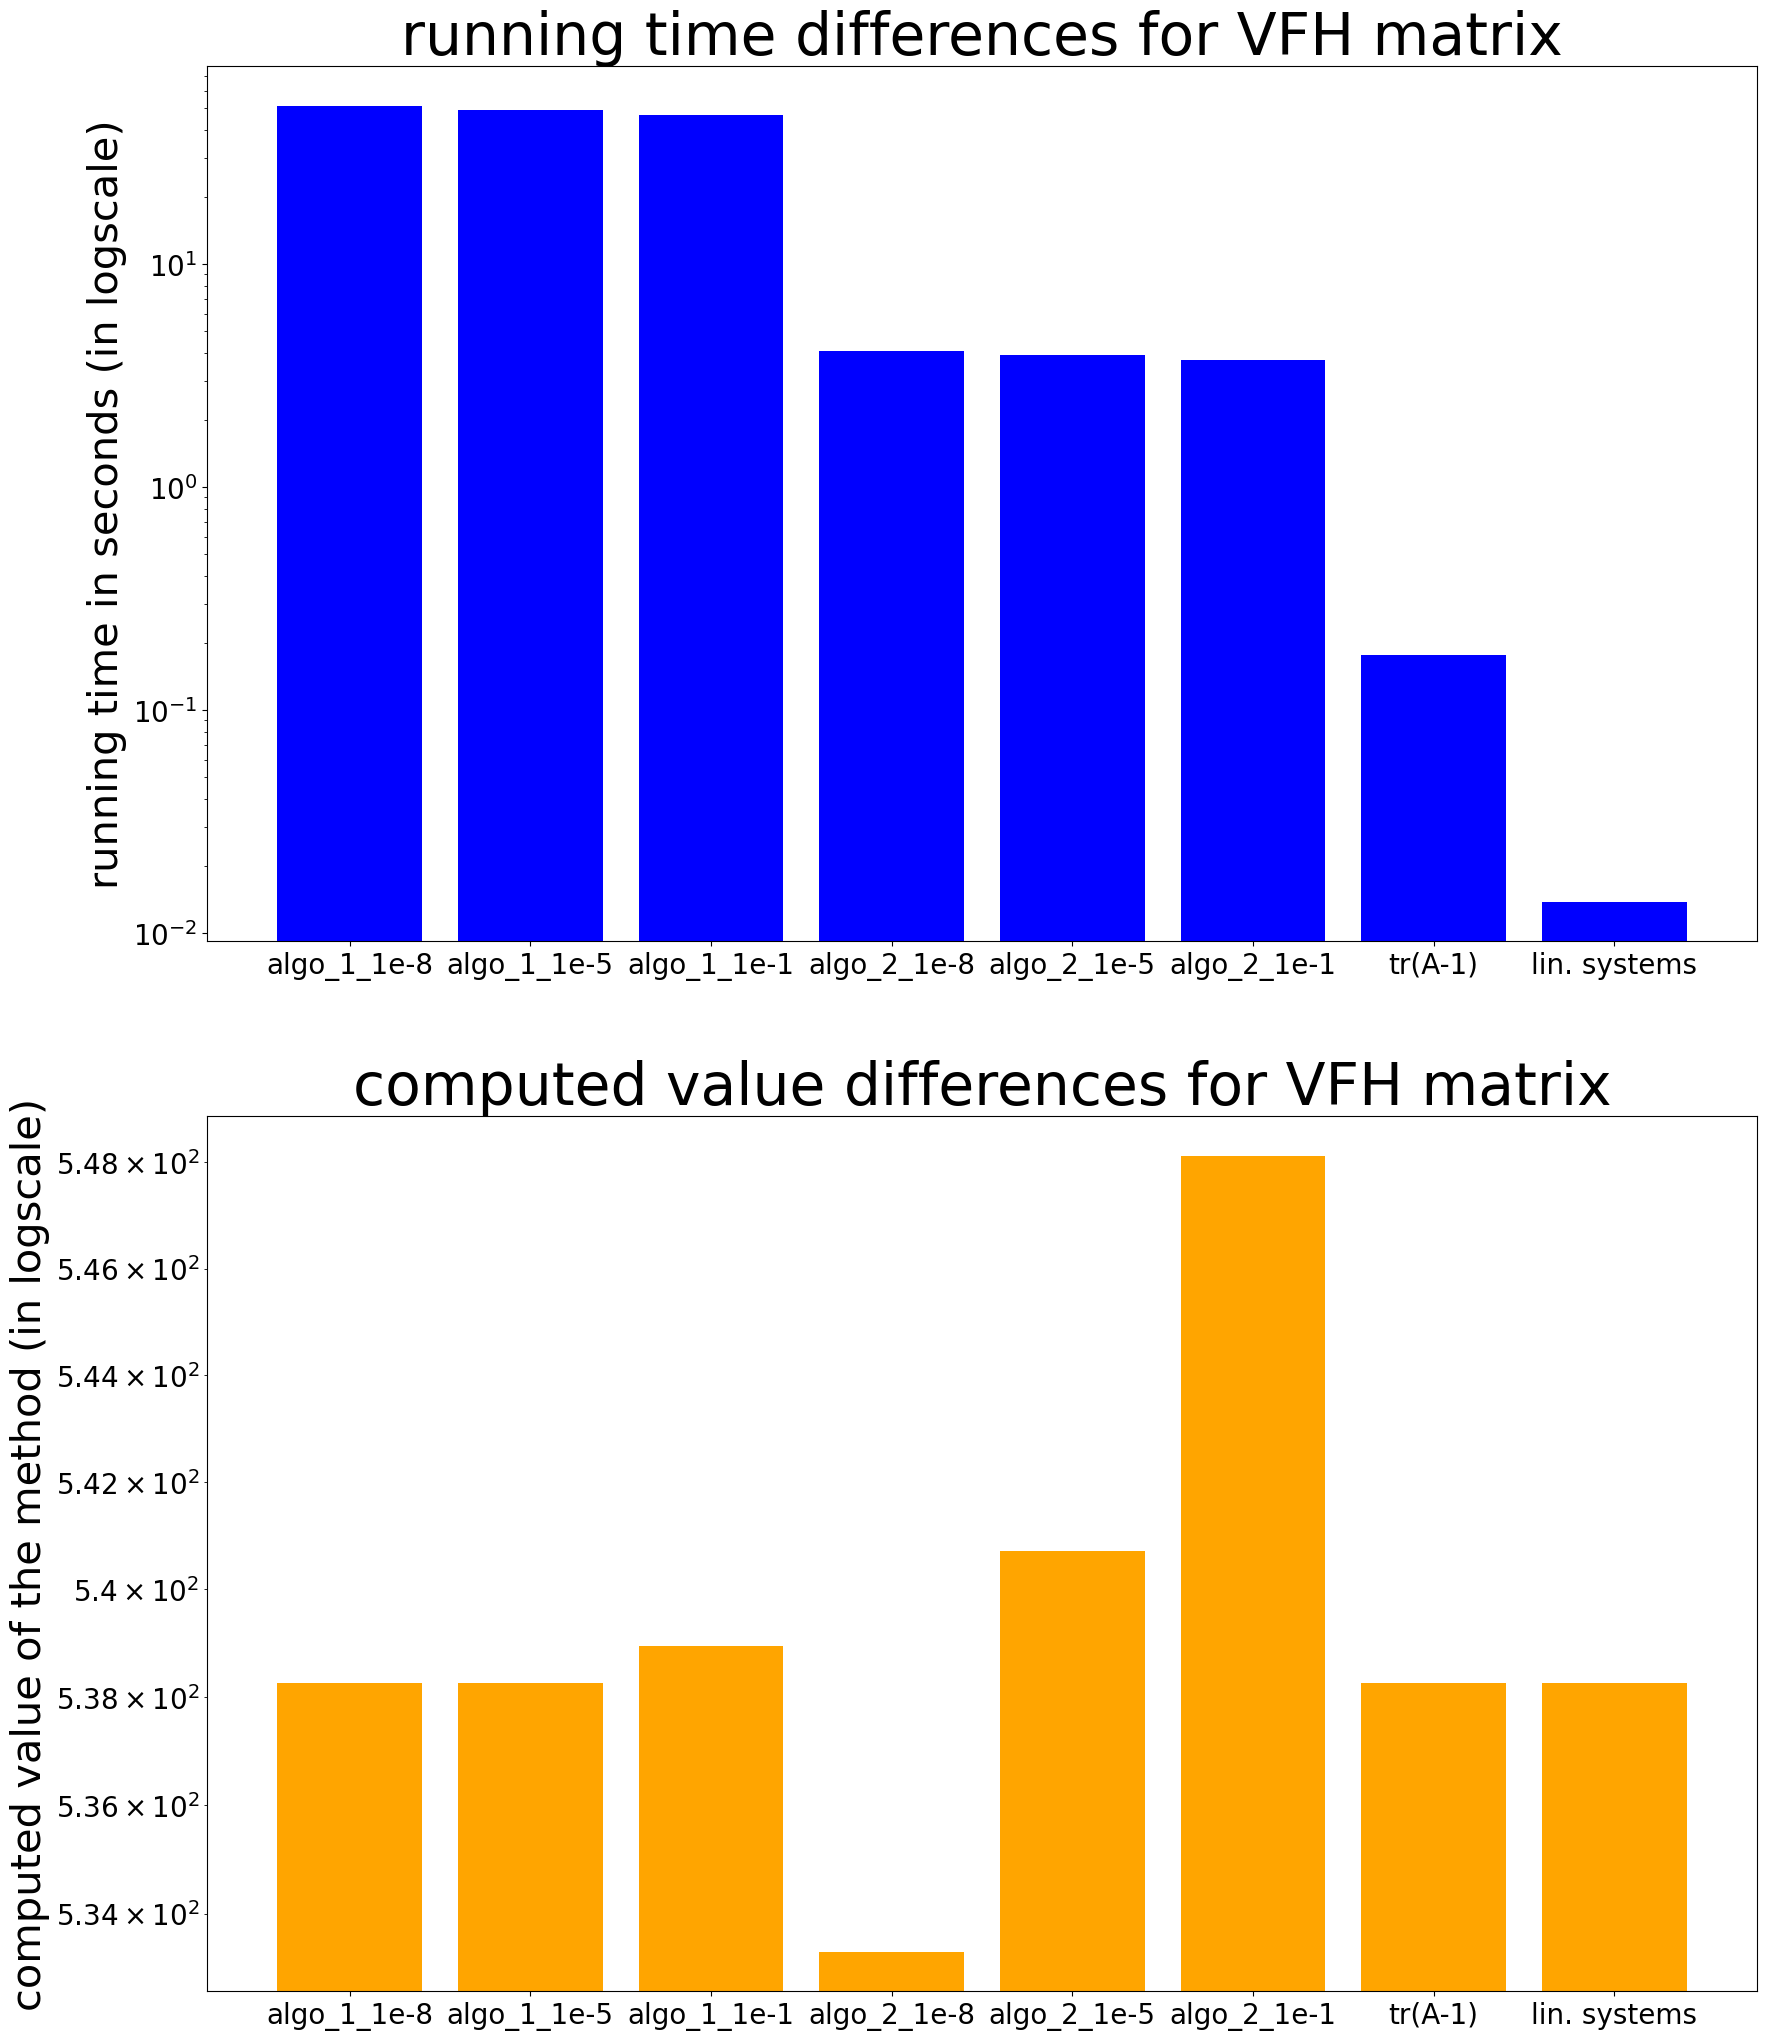

In [10]:
numerical_experiments2(VFH_matrix, "VFH matrix", 'running_time_VFH_matrix')

#### Poisson matrix

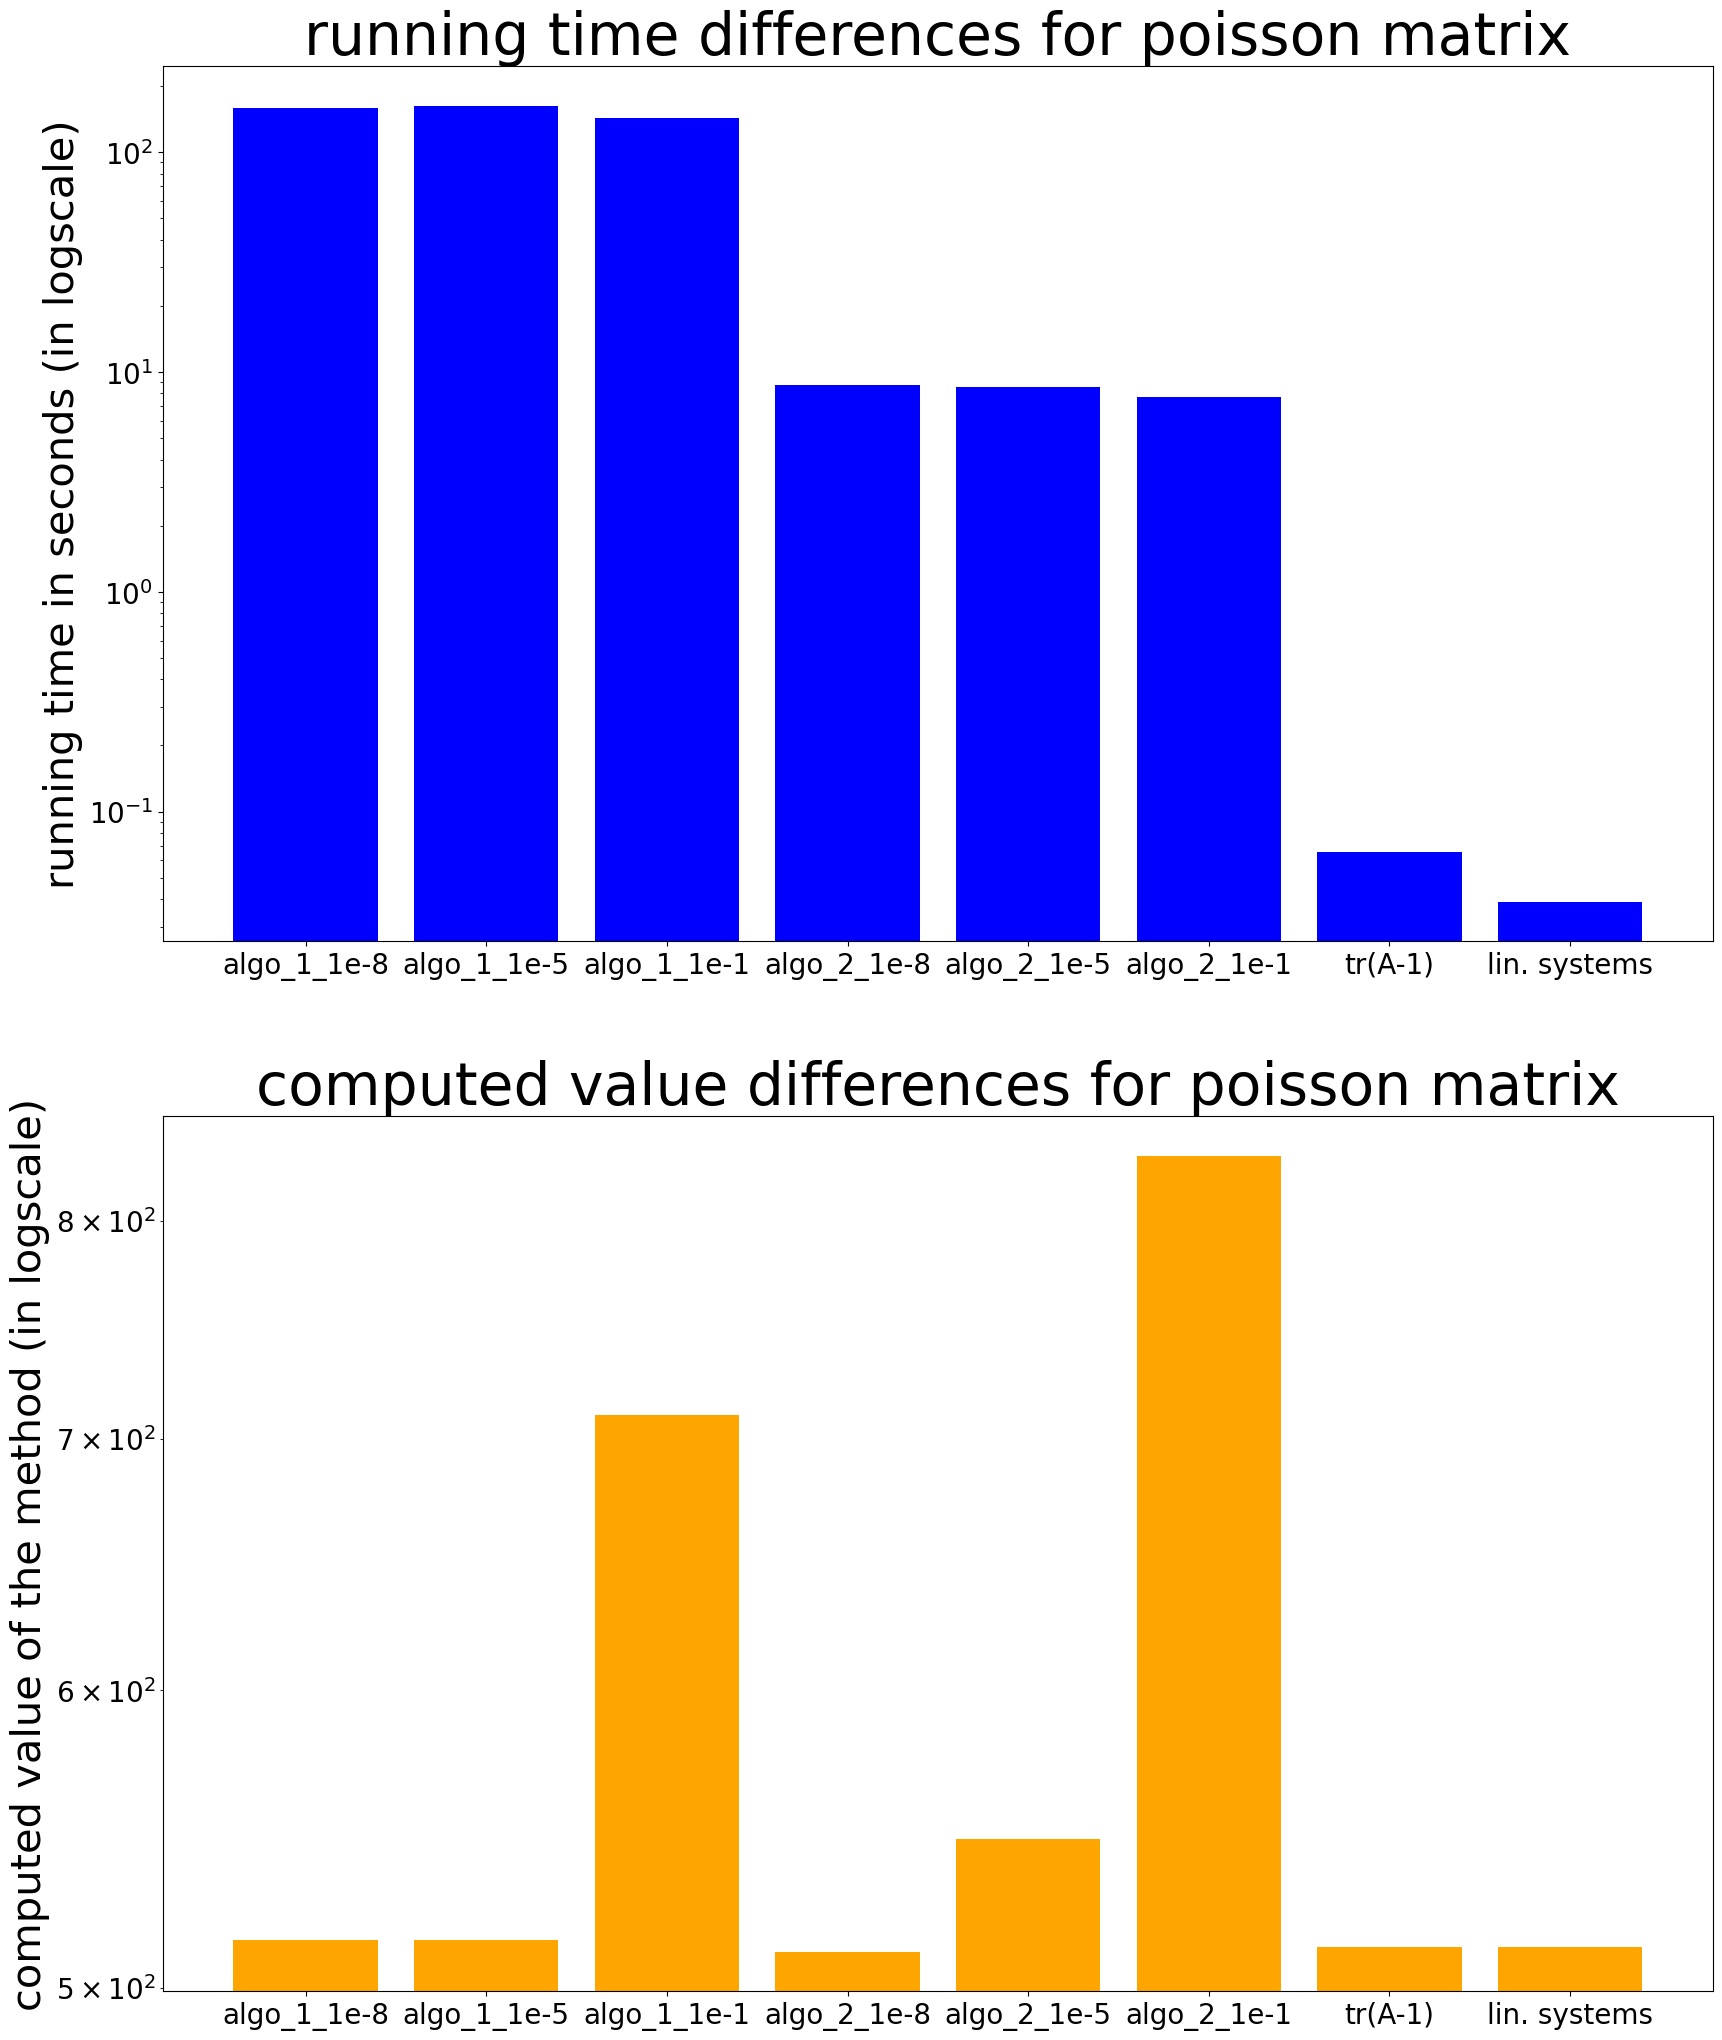

In [11]:
numerical_experiments2(poisson_matrix, "poisson matrix", 'running_time_poisson_matrix')

#### Wathen matrix

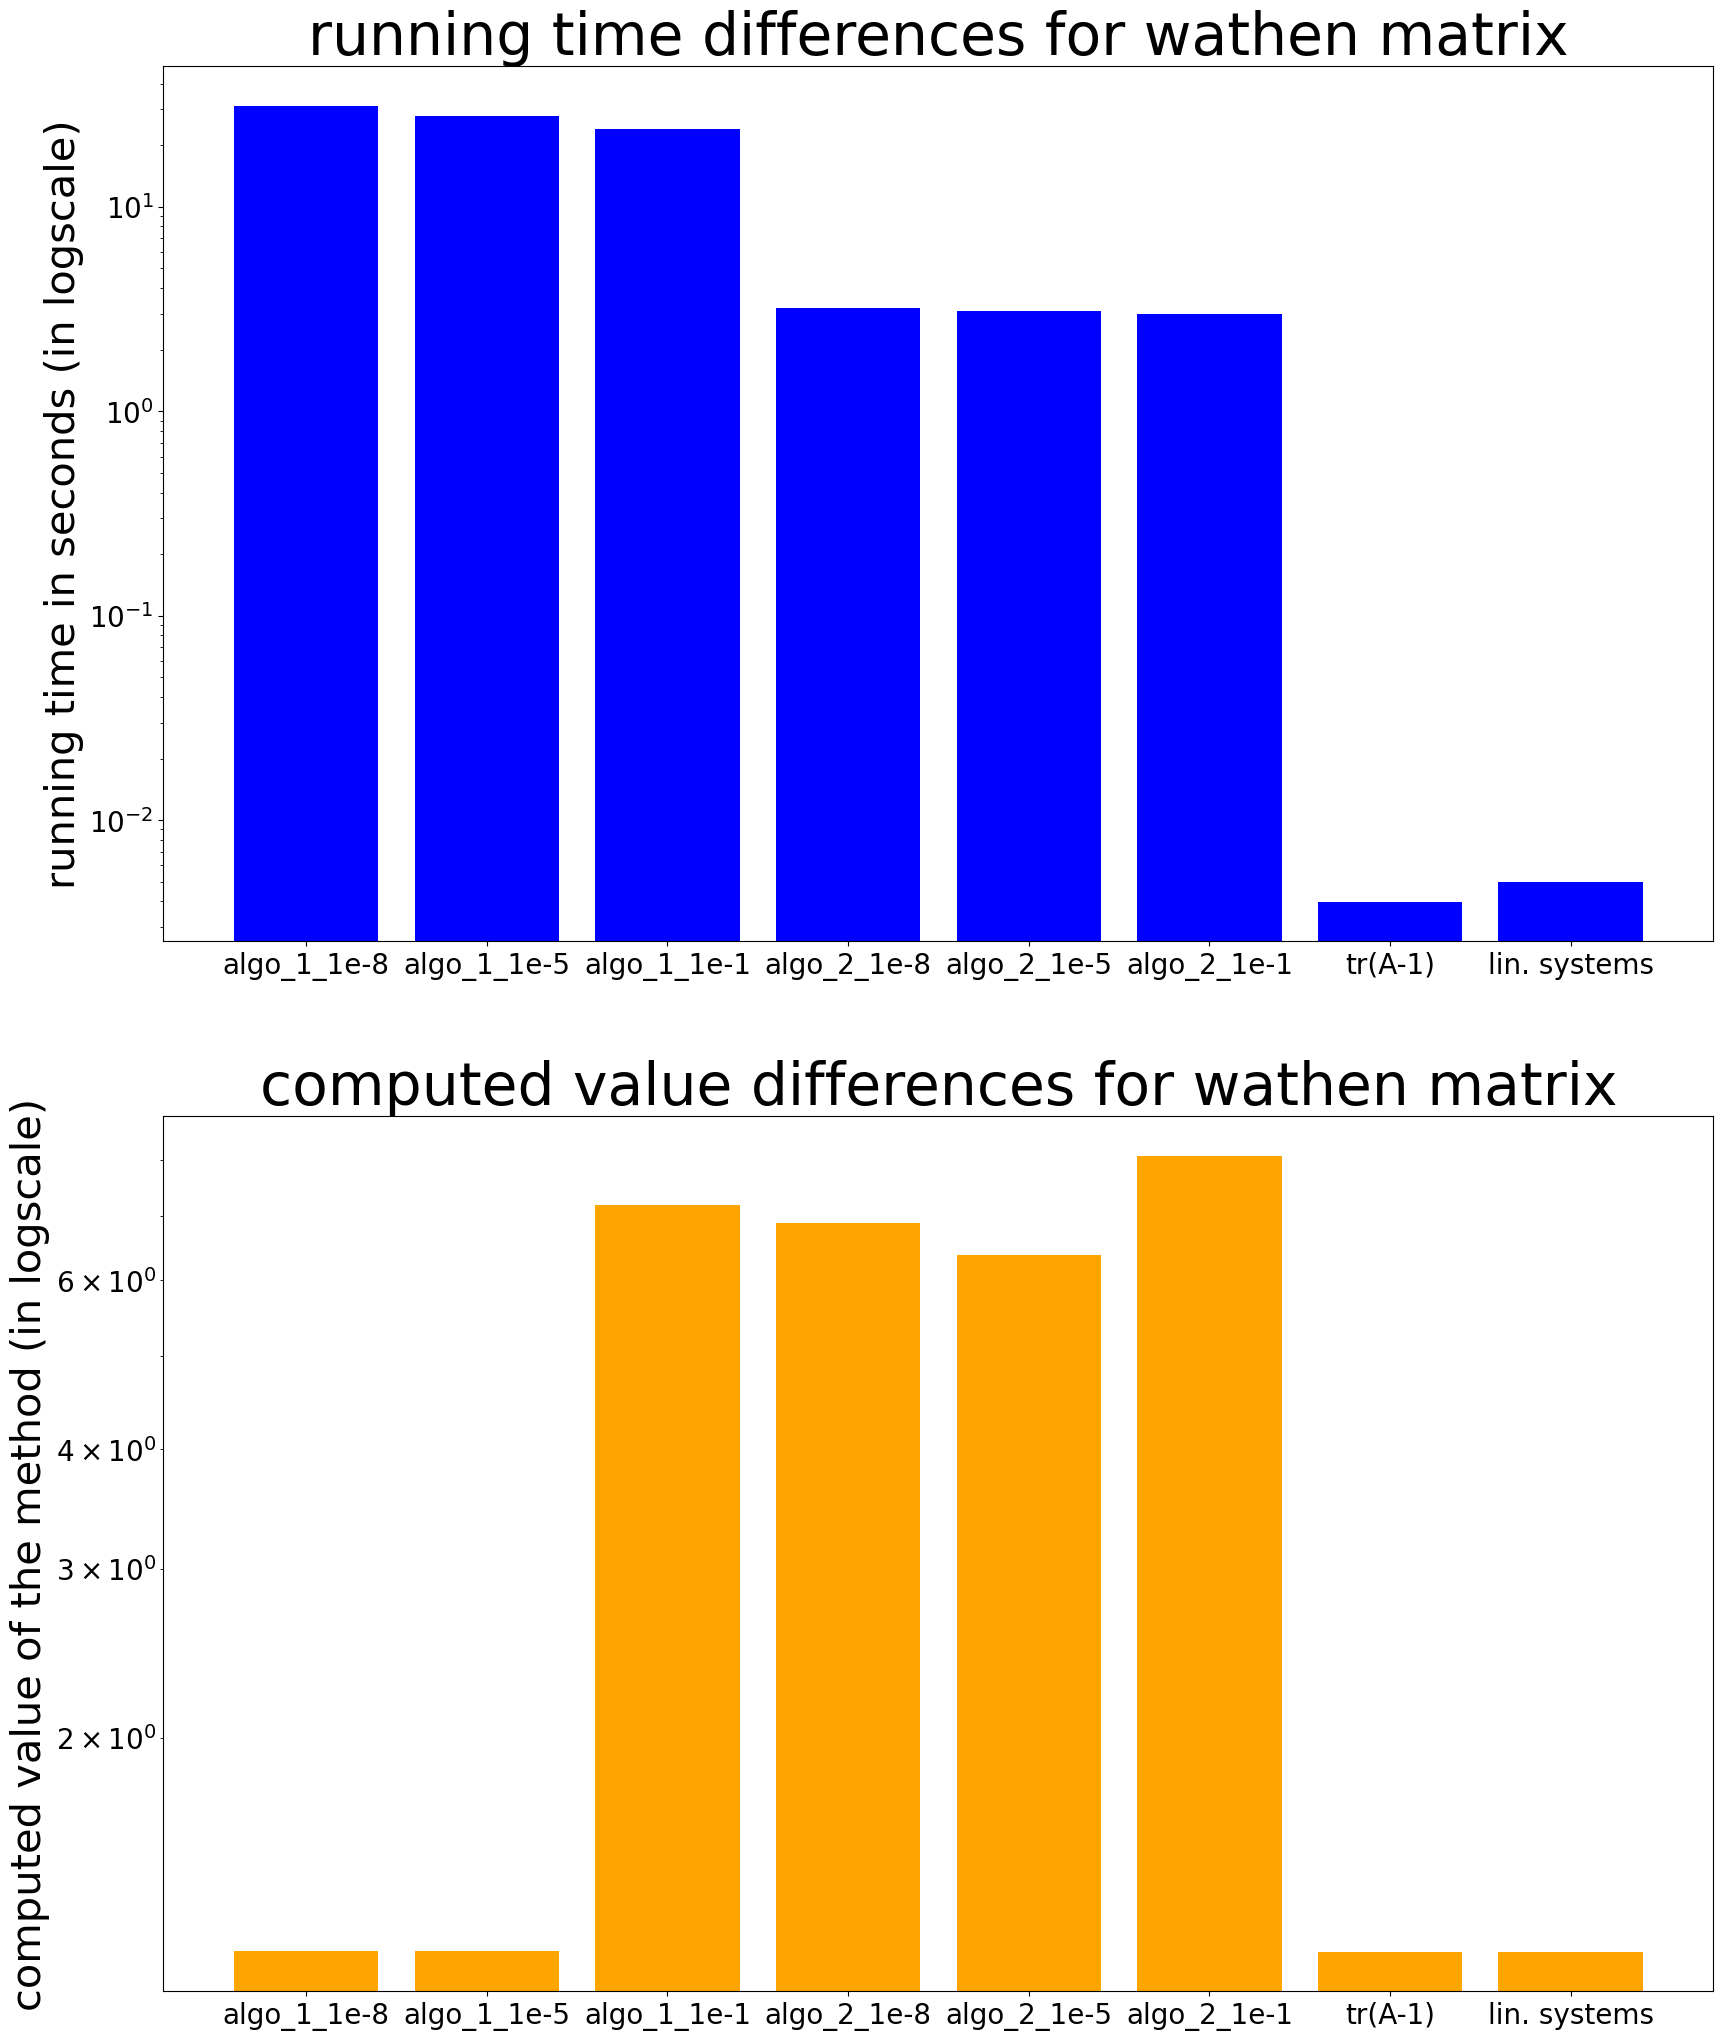

In [12]:
numerical_experiments2(wathen_matrix, "wathen matrix", 'running_time_wathen_matrix')

#### Lehmer matrix

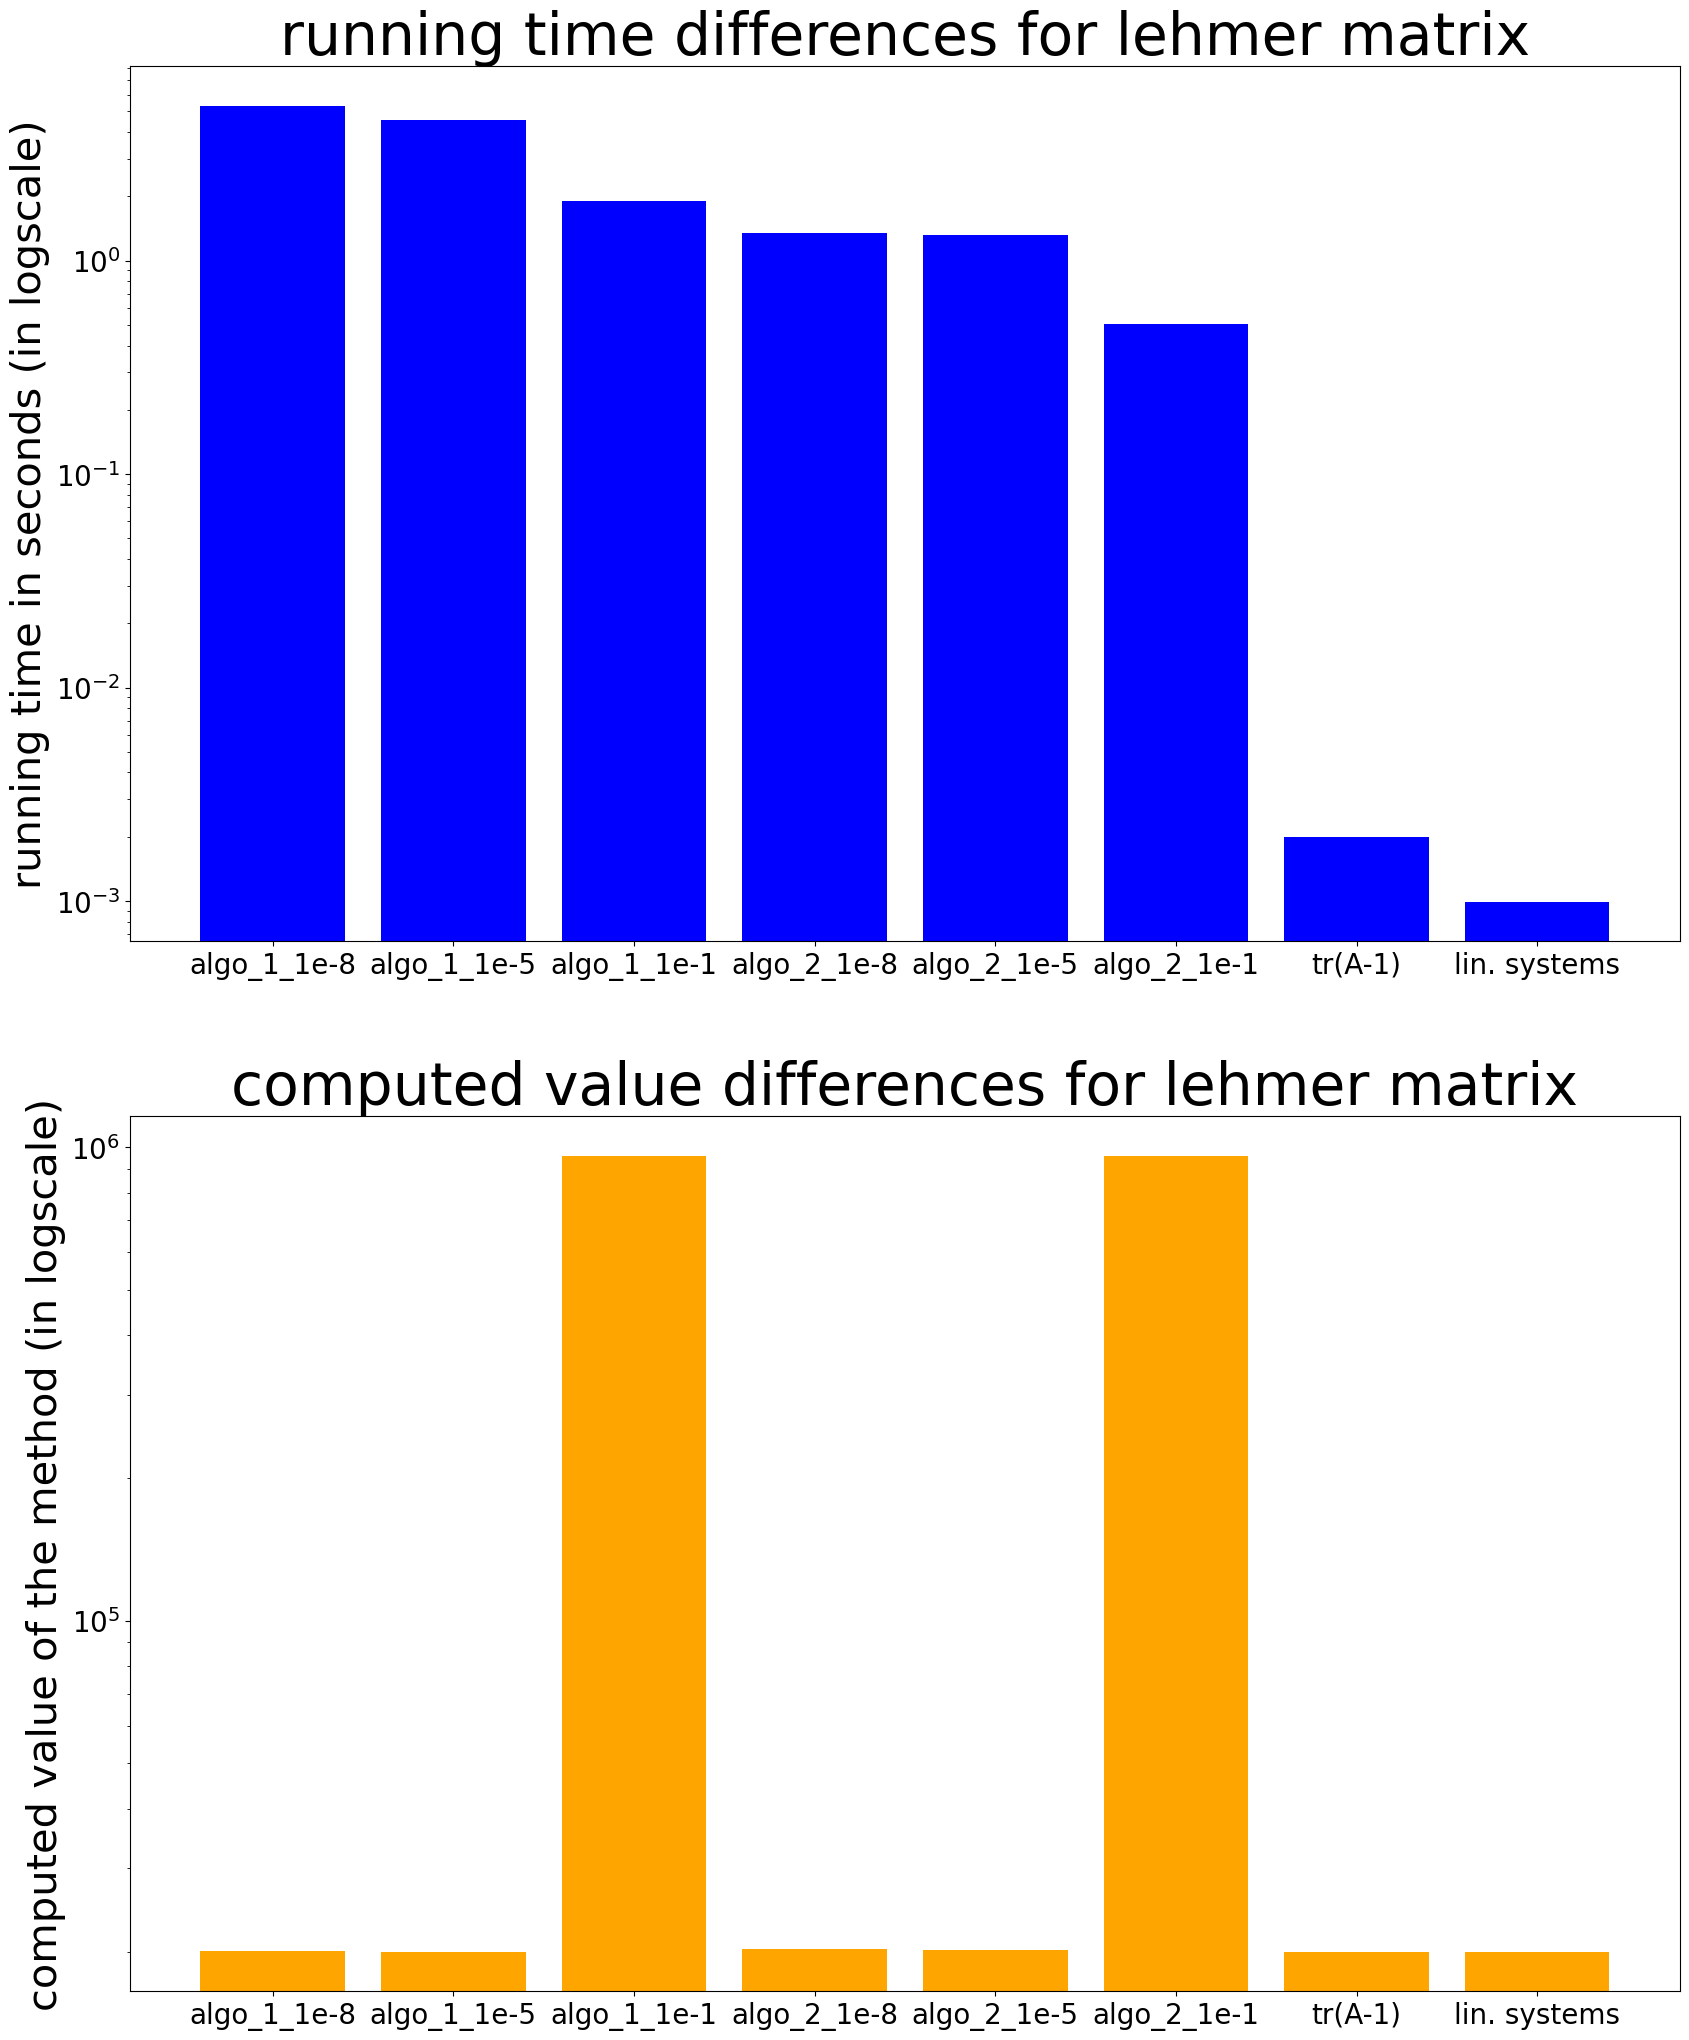

In [13]:
numerical_experiments2(lehmer_matrix, "lehmer matrix", 'running_time_lehmer_matrix')

#### Pei matrix

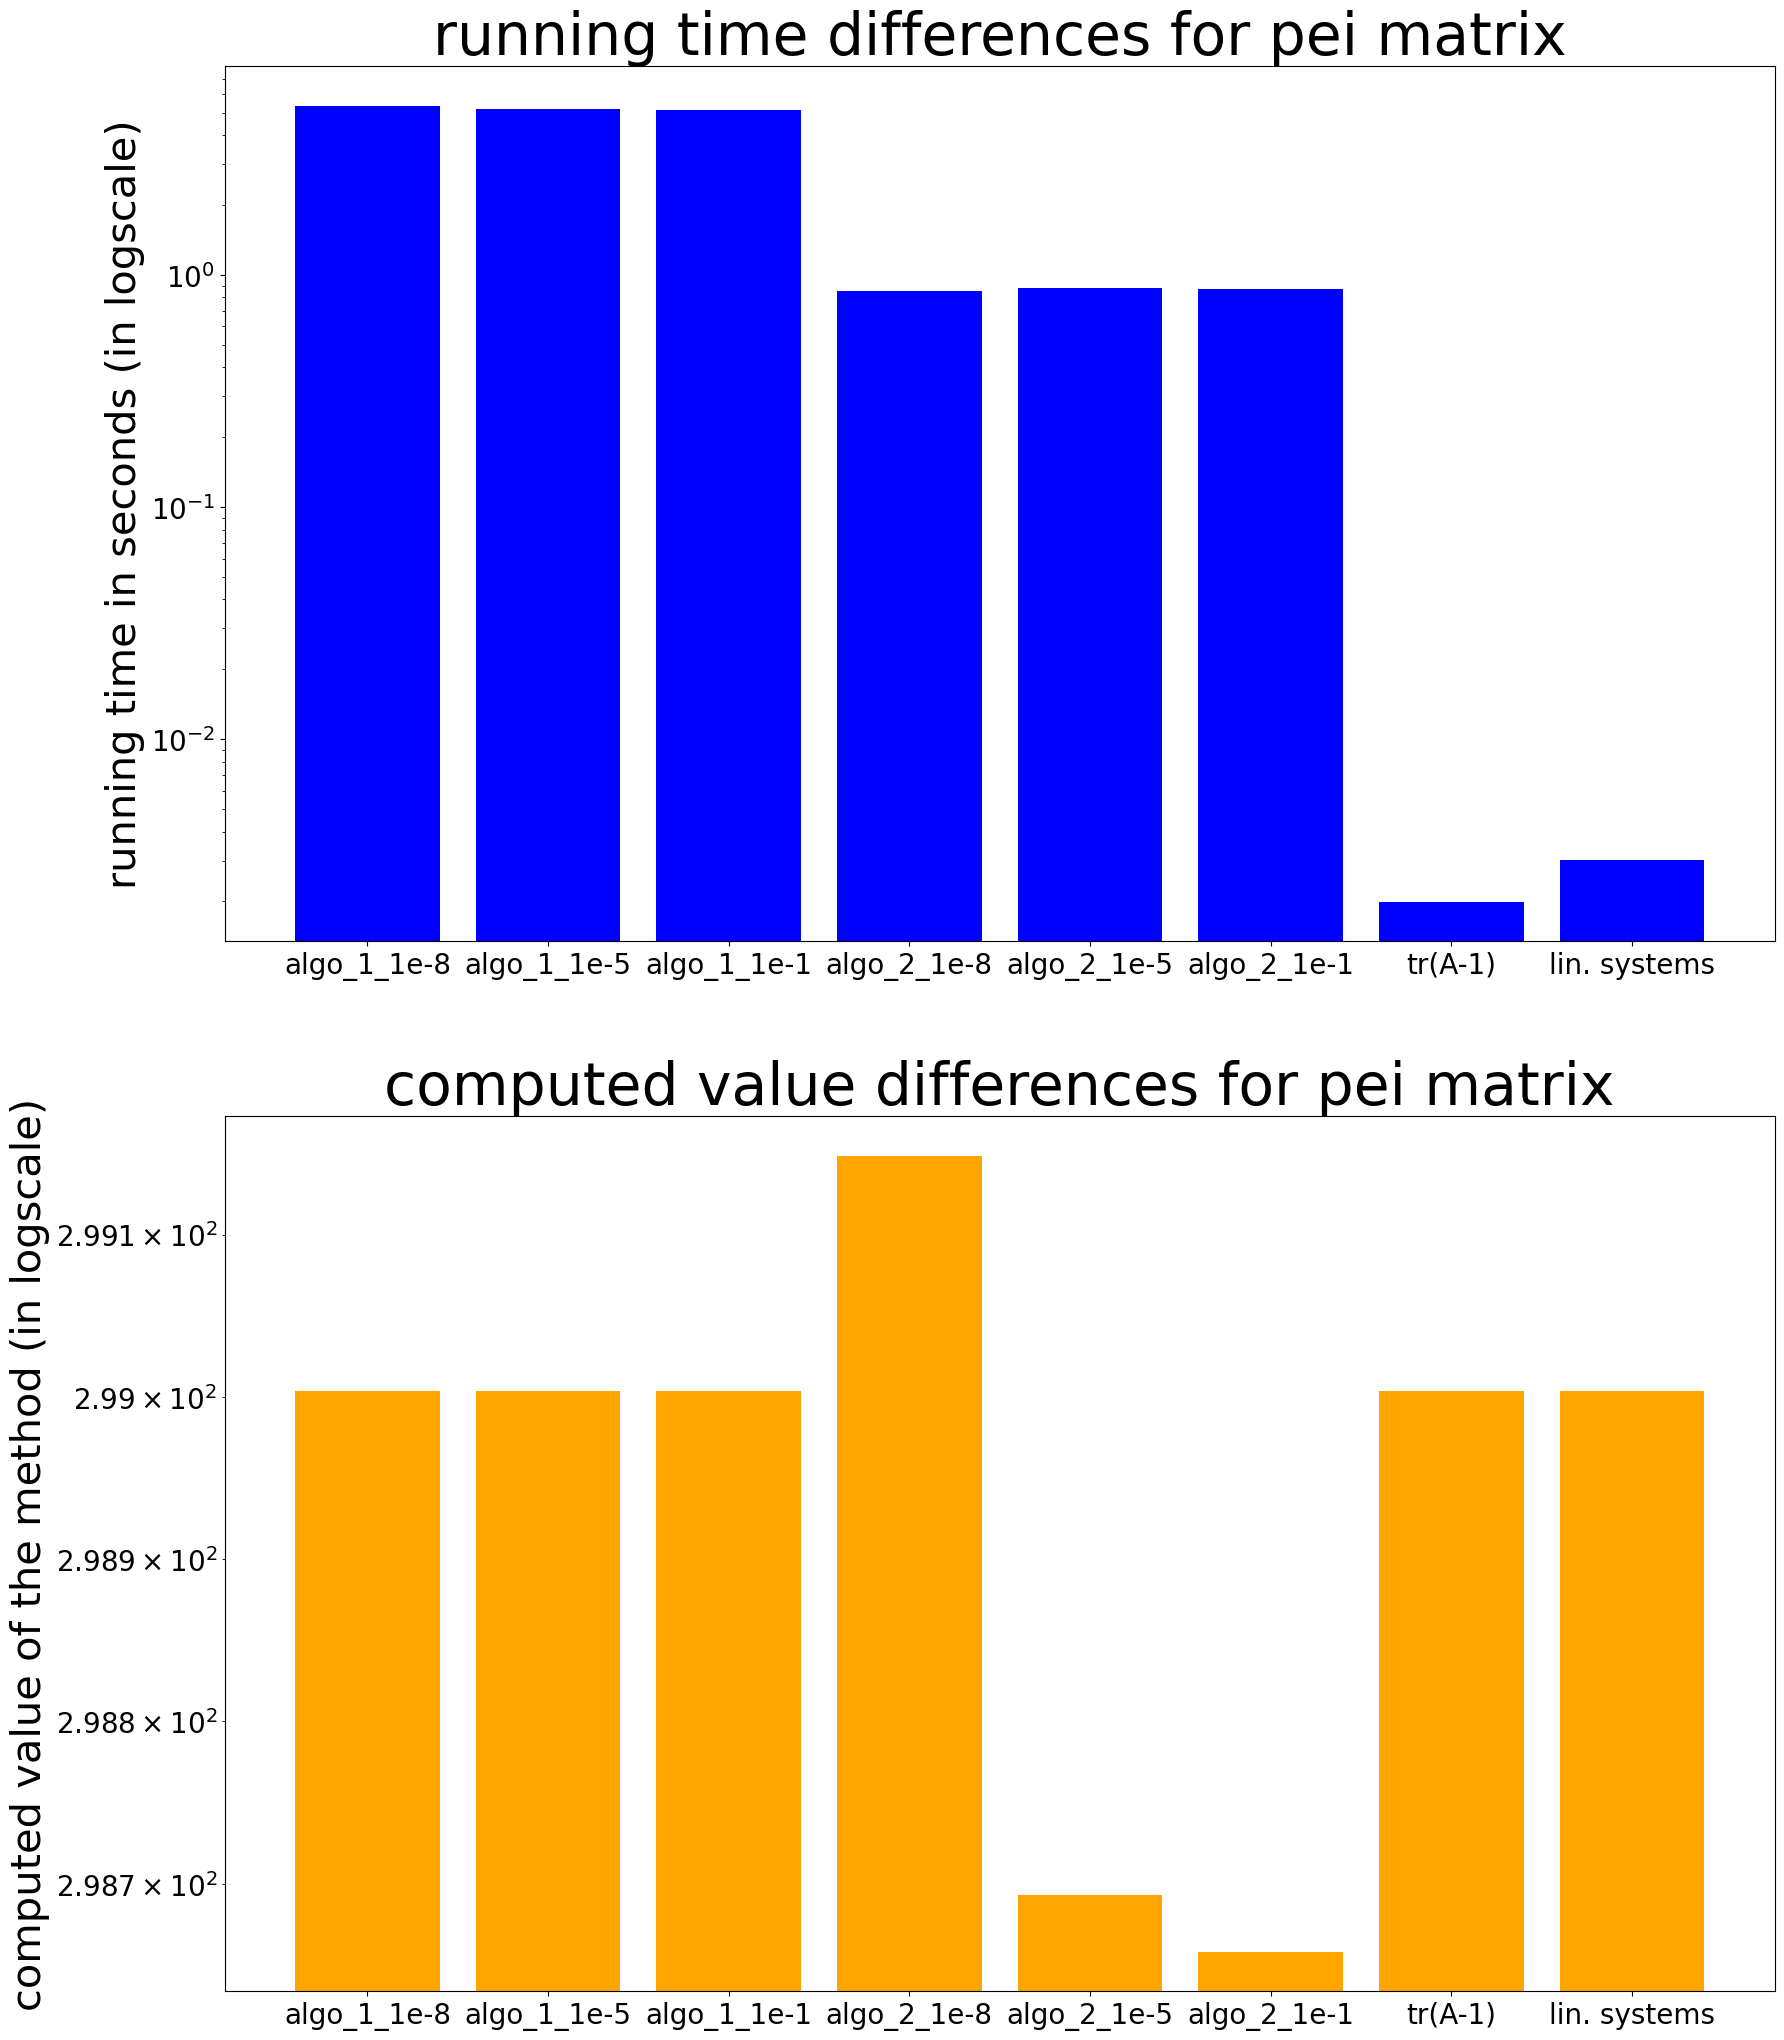

In [14]:
numerical_experiments2(pei_matrix, "pei matrix", 'running_time_pei_matrix')